In [17]:
import cv2 as cv
import numpy as np
import os
from yolov5 import YOLOv5

In [18]:
# Functions
def importImages(path):
    "Function to import all images from a folder"
    images = []
    for filename in os.listdir(path):
        img = cv.imread(os.path.join(path, filename))
        if img is not None:
            images.append(img)
    return images

def showImage(preprocessed=[False,], number=1):
    "Function to show an image"
    if preprocessed[0]:
        cv.imshow("Image",preprocessed[1])
    else:
        cv.imshow("Image", importImages("data/easy")[number])
    cv.waitKey(0)
    cv.destroyAllWindows()

def preprocess(gamma=[False, 1.5], equalize=False, grayscale=False, bilateralFilter=False, gaussianBlur=False):
    "Function to preprocess the images"
    images = importImages("data/easy")
    preprocessed = []
    for img in images:
        # Convert to grayscale if needed
        if grayscale:
            img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
        
        # Apply bilateral filter if needed
        if bilateralFilter:
            img = cv.bilateralFilter(img, d=9, sigmaColor=75, sigmaSpace=75)
        
        # Apply Gaussian blur if needed
        if gaussianBlur:
            img = cv.GaussianBlur(img, (9, 9), 1)
        
        # Gamma correction
        if gamma[0]:
            img = img / 255.0  # Normalize to 0-1
            img = np.power(img, gamma[1])
            img = (img * 255).clip(0, 255).astype(np.uint8)  # Denormalize to 0-255
        
        # Equalize histogram
        if equalize:
            if len(img.shape) == 2:  # Grayscale image
                img = cv.equalizeHist(img)
            else:  # Color image
                img_yuv = cv.cvtColor(img, cv.COLOR_BGR2YUV)
                img_yuv[:, :, 0] = cv.equalizeHist(img_yuv[:, :, 0])
                img = cv.cvtColor(img_yuv, cv.COLOR_YUV2BGR)
        
        preprocessed.append(img)
    return preprocessed

In [19]:
preprocessed = preprocess(gamma=[False, 0.7], equalize=False, grayscale=False, bilateralFilter=False, gaussianBlur=True)

In [9]:
showImage(preprocessed=[True, preprocessed[10]])

: 

In [20]:

# Initialize YOLO model
model_path = "yolov5s.pt"  # Pretrained YOLOv5 model
device = "cuda"  # Use "cuda" for GPU
model = YOLOv5(model_path, device=device)

# Define traffic light color ranges in HSV
RED_LOWER = np.array([0, 120, 70])
RED_UPPER = np.array([10, 255, 255])
GREEN_LOWER = np.array([36, 100, 100])
GREEN_UPPER = np.array([86, 255, 255])
YELLOW_LOWER = np.array([15, 150, 150])
YELLOW_UPPER = np.array([35, 255, 255])

# Load images
images_path_easy = "data/easy/"  # Path to easy images
easy_images = [cv.imread(images_path_easy + img) for img in ["tl5.png"]]
easy_images = [preprocessed[10]]

# Function to detect traffic light status
def detect_traffic_light_status(image):
    hsv = cv.cvtColor(image, cv.COLOR_BGR2HSV)

    # Detect red
    mask_red = cv.inRange(hsv, RED_LOWER, RED_UPPER)
    red_count = cv.countNonZero(mask_red)

    # Detect green
    mask_green = cv.inRange(hsv, GREEN_LOWER, GREEN_UPPER)
    green_count = cv.countNonZero(mask_green)

    # Detect yellow
    mask_yellow = cv.inRange(hsv, YELLOW_LOWER, YELLOW_UPPER)
    yellow_count = cv.countNonZero(mask_yellow)

    if red_count > green_count and red_count > yellow_count:
        return "Red"
    elif green_count > red_count and green_count > yellow_count:
        return "Green"
    elif yellow_count > red_count and yellow_count > green_count:
        return "Yellow"
    else:
        return "Unknown"

# Process each image
for idx, image in enumerate(easy_images):
    # Object detection
    results = model.predict(image)
    detections = results.pandas().xyxy[0]  # Bounding box coordinates and labels

    for _, row in detections.iterrows():
        x1, y1, x2, y2, confidence, label = row["xmin"], row["ymin"], row["xmax"], row["ymax"], row["confidence"], row["name"]

        # Draw bounding box
        cv.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
        
        # Analyze traffic light if detected
        if label == "traffic light":
            light_roi = image[int(y1):int(y2), int(x1):int(x2)]
            status = detect_traffic_light_status(light_roi)
            cv.putText(image, status, (int(x1), int(y1)-10), cv.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 255), 2)

        # Perform OCR for speed limit signs (placeholder for OCR logic)
        if label == "speed limit":
            # Use OCR library like Tesseract to extract speed limit value
            cv.putText(image, "Speed Limit Detected", (int(x1), int(y1)-10), cv.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    # Save and display results
    cv.imshow(f"Processed Image {idx+1}", image)
    cv.waitKey(0)

cv.destroyAllWindows()

YOLOv5  2025-1-16 Python-3.12.0 torch-2.5.0+cu121 CPU

Fusing layers... 
YOLOv5s summary: 270 layers, 7235389 parameters, 0 gradients, 16.6 GFLOPs
Adding AutoShape... 
C:\Users\Lorenzo Vigorelli\AppData\Roaming\Python\Python312\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


: 

YOLOv5  2025-1-16 Python-3.12.0 torch-2.5.0+cu121 CPU

Fusing layers... 
YOLOv5s summary: 270 layers, 7235389 parameters, 0 gradients, 16.6 GFLOPs
Adding AutoShape... 
python: can't open file 'c:\\Users\\Lorenzo Vigorelli\\OneDrive - Università degli Studi di Padova\\MAGISTRALE UNIPD\\Third semester\\Computer vision\\OBJECT-RECOGNITION\\train.py': [Errno 2] No such file or directory
C:\Users\Lorenzo Vigorelli\AppData\Roaming\Python\Python312\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


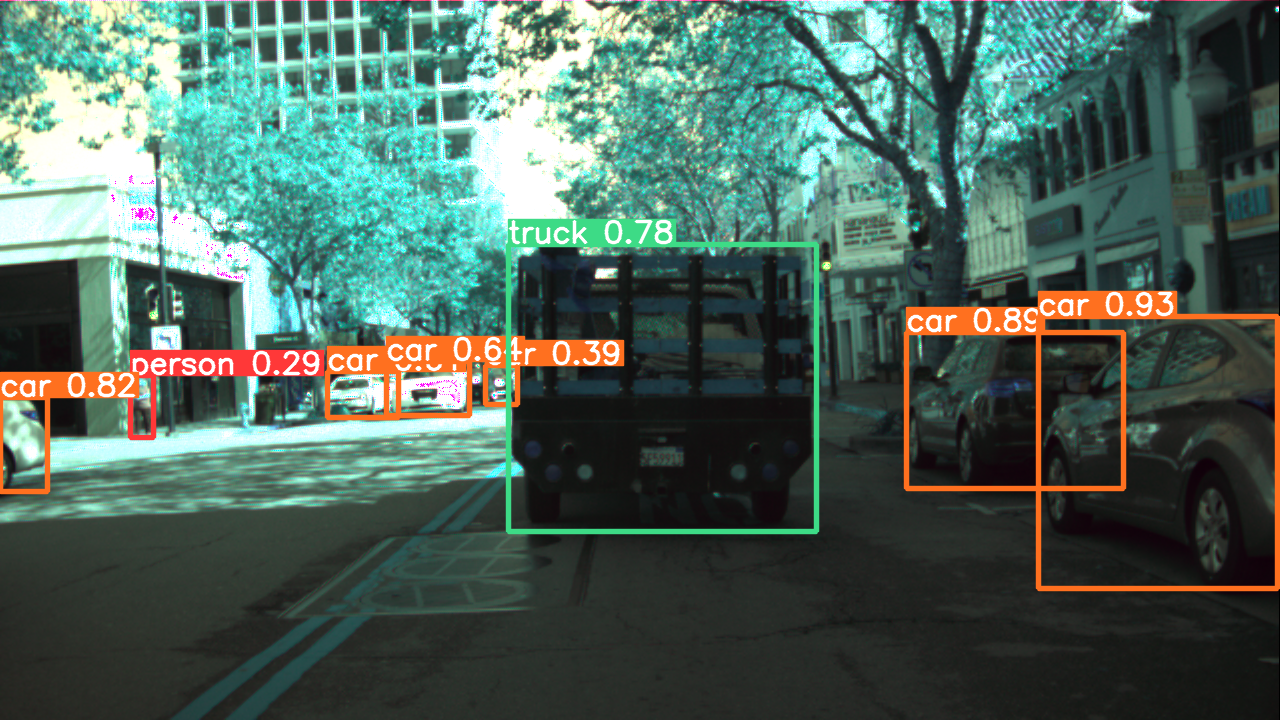

In [30]:
import torch
import cv2 as cv
import numpy as np
from pathlib import Path
from yolov5 import YOLOv5

# Definisci le classi
class_mapping = ['green', 'yellow', 'red', 'off']

# Carica il modello YOLOv5 pre-addestrato
model_path = "yolov5s.pt"  # Path del modello pre-addestrato
device = "cpu"  # Usa "cuda" per GPU, "cpu" per la CPU
model = YOLOv5(model_path, device=device)

# Configura la directory del dataset
train_dir = 'dataset/images/train'
val_dir = 'dataset/images/test'
train_label_dir = 'dataset/labels/train'
val_label_dir = 'dataset/labels/test'

# Funzione per fare il fine-tuning del modello
def train_yolov5():
    # Crea un dizionario di configurazione del dataset
    dataset = {
        'train': {
            'images': train_dir,
            'labels': train_label_dir
        },
        'val': {
            'images': val_dir,
            'labels': val_label_dir
        },
        'nc': len(class_mapping),  # Numero di classi
        'names': class_mapping      # Nomi delle classi
    }

    # Salva la configurazione in un file yaml
    yaml_path = 'dataset.yaml'
    with open(yaml_path, 'w') as f:
        f.write(f'train: {train_dir}\n')
        f.write(f'val: {val_dir}\n')
        f.write(f'nc: {len(class_mapping)}\n')
        f.write(f'names: {class_mapping}\n')

    # Carica il dataset in YOLOv5
    # Esegui il fine-tuning con il dataset personalizzato
    # Usa il comando di training da YOLOv5 CLI
    !python train.py --img 640 --batch 16 --epochs 500 --data {yaml_path} --weights {model_path} --device {device}

# Funzione per testare il modello
def test_yolov5(image_path):
    # Carica l'immagine
    image = cv.imread(image_path)

    # Prevedi gli oggetti nell'immagine
    results = model.predict(image)

    # Visualizza i risultati
    results.show()

# Funzione per inferenza su immagini
def detect_traffic_light_status(image):
    hsv = cv.cvtColor(image, cv.COLOR_BGR2HSV)

    # Definisci gli intervalli di colore (rosso, verde, giallo) in HSV
    RED_LOWER = np.array([0, 120, 70])
    RED_UPPER = np.array([10, 255, 255])
    GREEN_LOWER = np.array([36, 100, 100])
    GREEN_UPPER = np.array([86, 255, 255])
    YELLOW_LOWER = np.array([15, 150, 150])
    YELLOW_UPPER = np.array([35, 255, 255])

    # Rileva il semaforo rosso
    mask_red = cv.inRange(hsv, RED_LOWER, RED_UPPER)
    red_count = cv.countNonZero(mask_red)

    # Rileva il semaforo verde
    mask_green = cv.inRange(hsv, GREEN_LOWER, GREEN_UPPER)
    green_count = cv.countNonZero(mask_green)

    # Rileva il semaforo giallo
    mask_yellow = cv.inRange(hsv, YELLOW_LOWER, YELLOW_UPPER)
    yellow_count = cv.countNonZero(mask_yellow)

    if red_count > green_count and red_count > yellow_count:
        return "Red"
    elif green_count > red_count and green_count > yellow_count:
        return "Green"
    elif yellow_count > red_count and yellow_count > green_count:
        return "Yellow"
    else:
        return "Unknown"

# Avvia il fine-tuning
train_yolov5()

# Test su una nuova immagine
test_yolov5('data/hard/tl4h.png')


C:\Users\Lorenzo Vigorelli\AppData\Roaming\Python\Python312\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


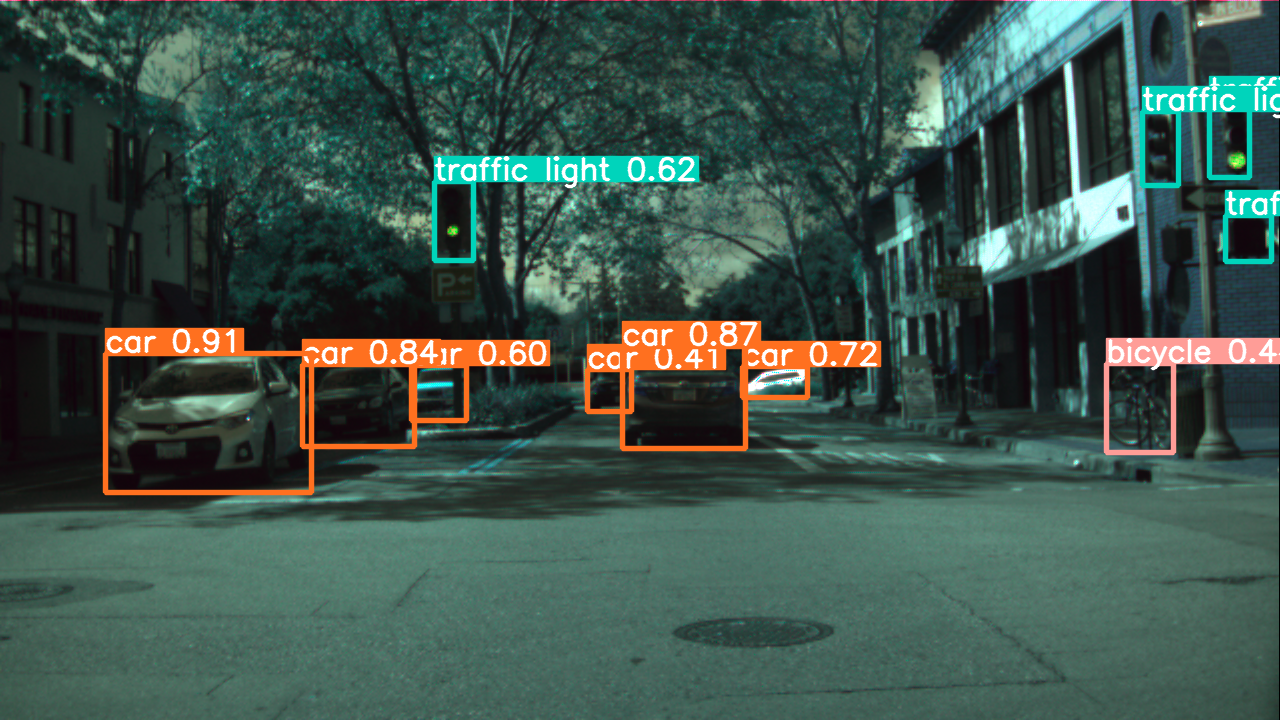

In [11]:
# Test su una nuova immagine
test_yolov5('data/easy/tl6.png')

In [20]:

image = cv.imread('data/easy/tl6.png')
# Risultati dalla previsione del modello
results = model.predict(image)

# Estrai le predizioni
detections = results.pandas().xyxy[0]  # Bounding box e etichette

for _, row in detections.iterrows():
    x1, y1, x2, y2, confidence, label = row["xmin"], row["ymin"], row["xmax"], row["ymax"], row["confidence"], row["name"]

    # Disegna il bounding box
    cv.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)

    # Verifica la classe rilevata (colori del semaforo)
    if label in ['red', 'green', 'yellow']:
        cv.putText(image, f"{label.capitalize()} Traffic Light", (int(x1), int(y1)-10), cv.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 255), 2)

# Mostra i risultati
cv.imshow(f"Processed Image", image)
cv.waitKey(0)


C:\Users\Lorenzo Vigorelli\AppData\Roaming\Python\Python312\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1301: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvShowImage'


In [28]:
!python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   -------------------------------


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: THESE PACKAGES DO NOT MATCH THE HASHES FROM THE REQUIREMENTS FILE. If you have updated the package versions, please update the hashes. Otherwise, examine the package contents carefully; someone may have tampered with them.
    unknown package:
        Expected sha256 3790624780082365f47549d032f3770eeb2b1e8bd1f7b2e02dace1afa361b4ed
             Got        ef74625b5934a5104fb21156566c3e85011e391375c575dc4801b34c4d6de9c1



In [23]:
import cv2 as cv
import numpy as np

# Assicurati che l'immagine venga letta correttamente
image_path = "data/easy/tl6.png"
image = cv.imread(image_path)

if image is None:
    print("Errore nel caricare l'immagine:", image_path)
else:
    print("Immagine caricata correttamente")
    
    # Fai la previsione con YOLOv5 (presupponendo che il modello sia già caricato)
    results = model.predict(image)
    detections = results.pandas().xyxy[0]  # Bounding box e etichette

    if detections.empty:
        print("Nessuna rilevazione trovata")
    else:
        for _, row in detections.iterrows():
            x1, y1, x2, y2 = row["xmin"], row["ymin"], row["xmax"], row["ymax"]
            cv.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)

            # Verifica la classe rilevata (colori del semaforo)
            label = row["name"]
            if label in ['red', 'green', 'yellow']:
                cv.putText(image, f"{label.capitalize()} Traffic Light", (int(x1), int(y1)-10), cv.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 255), 2)

        # Mostra l'immagine con le rilevazioni
        cv.imshow("Detected Traffic Lights", image)
        cv.waitKey(0)
        cv.destroyAllWindows()


Immagine caricata correttamente


C:\Users\Lorenzo Vigorelli\AppData\Roaming\Python\Python312\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1301: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvShowImage'
